In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [23]:
df=pd.read_csv('/content/INDHOTEL.NS.csv')

In [24]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [25]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,49.458313,50.774178,49.004566,50.456554,47.514137,787409.0
2012-01-03,51.001053,54.404144,50.365807,53.678150,50.547871,756719.0
2012-01-04,52.634537,54.313396,52.226166,53.995773,50.846962,447769.0
2012-01-05,53.950401,55.084766,53.542027,54.404144,51.231514,395705.0
2012-01-06,54.449520,55.175514,53.632778,54.857891,51.658802,320046.0


In [26]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3092.000000,3092.000000,3092.000000,3092.000000,3092.000000,3.092000e+03
mean,155.470016,157.910048,152.835180,155.303116,153.161992,2.282818e+06
std,125.115631,126.512858,123.348734,124.989105,125.280864,3.902994e+06
min,36.118183,36.571926,34.030949,34.938442,33.959854,0.000000e+00
25%,84.306007,85.973526,82.627144,84.358852,82.032898,4.749582e+05
50%,115.932106,117.520218,113.844872,115.546421,112.767837,1.094446e+06
75%,147.244492,149.098987,144.735462,146.796009,144.340939,2.730455e+06
max,660.000000,662.950012,646.799988,659.750000,659.750000,1.163617e+08


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3098 entries, 2012-01-02 to 2024-07-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3092 non-null   float64
 1   High       3092 non-null   float64
 2   Low        3092 non-null   float64
 3   Close      3092 non-null   float64
 4   Adj Close  3092 non-null   float64
 5   Volume     3092 non-null   float64
dtypes: float64(6)
memory usage: 169.4 KB


In [28]:
df.isna().sum()

Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
# Plot 1: Line plot of Close prices
fig1 = px.line(df, x=df.index, y='Close', title='Close Prices Over Time')
fig1.show()

In [31]:
# Plot 2: Line plot with moving averages
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close'))
fig2.add_trace(go.Scatter(x=df.index, y=df['MA10'], mode='lines', name='MA10'))
fig2.add_trace(go.Scatter(x=df.index, y=df['MA50'], mode='lines', name='MA50'))
fig2.update_layout(title='Close Prices with 10 and 50-Day Moving Averages')
fig2.show()

In [32]:
fig3 = go.Figure(data=[go.Candlestick(x=df.index,
                                      open=df['Open'],
                                      high=df['High'],
                                      low=df['Low'],
                                      close=df['Close'])])
fig3.update_layout(title='Candlestick Chart')
fig3.show()

In [34]:
# Plot 5: Correlation heatmap
corr_matrix = df.corr()
fig5 = px.imshow(corr_matrix, text_auto=True, title='Correlation Heatmap')
fig5.show()

In [35]:
# Plot 6: Scatter matrix for selected features
fig6 = px.scatter_matrix(df, dimensions=['Open', 'High', 'Low', 'Close', 'Volume'],
                         title='Scatter Matrix of Stock Data')
fig6.show()

**Data Visualization Insights**

- Line Plot of Close Prices: This plot shows the trend of closing prices over time.

- Moving Averages: These plots help identify the trend and potential support/resistance levels.

- Candlestick Chart: Useful for visualizing daily price movements and identifying patterns.

- Volume Traded: Helps in understanding the trading activity over time.

- Correlation Heatmap: Shows relationships between different features.

- Scatter Matrix: Helps visualize the relationships between features.

# **LSTM**

In [37]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assume df is your DataFrame and the 'Close' column is the target variable

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60  # Using 60 days of data to predict the next day's close price
X, y = create_sequences(scaled_data, seq_length)

# Reshape the data for LSTM [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into train and test sets
train_size = int(X.shape[0] * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20
76/76 [==============================] - 9s 57ms/step - loss: 5.4068e-04
Epoch 2/20
76/76 [==============================] - 6s 79ms/step - loss: 8.8026e-05
Epoch 3/20
76/76 [==============================] - 4s 56ms/step - loss: 8.0898e-05
Epoch 4/20
76/76 [==============================] - 5s 63ms/step - loss: 7.4414e-05
Epoch 5/20
76/76 [==============================] - 5s 71ms/step - loss: 6.8766e-05
Epoch 6/20
76/76 [==============================] - 4s 58ms/step - loss: 6.5470e-05
Epoch 7/20
76/76 [==============================] - 8s 110ms/step - loss: 5.8548e-05
Epoch 8/20
76/76 [==============================] - 5s 66ms/step - loss: 6.0435e-05
Epoch 9/20
76/76 [==============================] - 5s 65ms/step - loss: 5.2891e-05
Epoch 10/20
76/76 [==============================] - 5s 69ms/step - loss: 5.2371e-05
Epoch 11/20
76/76 [==============================] - 4s 56ms/step - loss: 5.2439e-05
Epoch 12/20
76/76 [==============================] - 7s 90ms/step - loss:

19/19 [==============================] - 1s 18ms/step
R-squared Value: 0.99


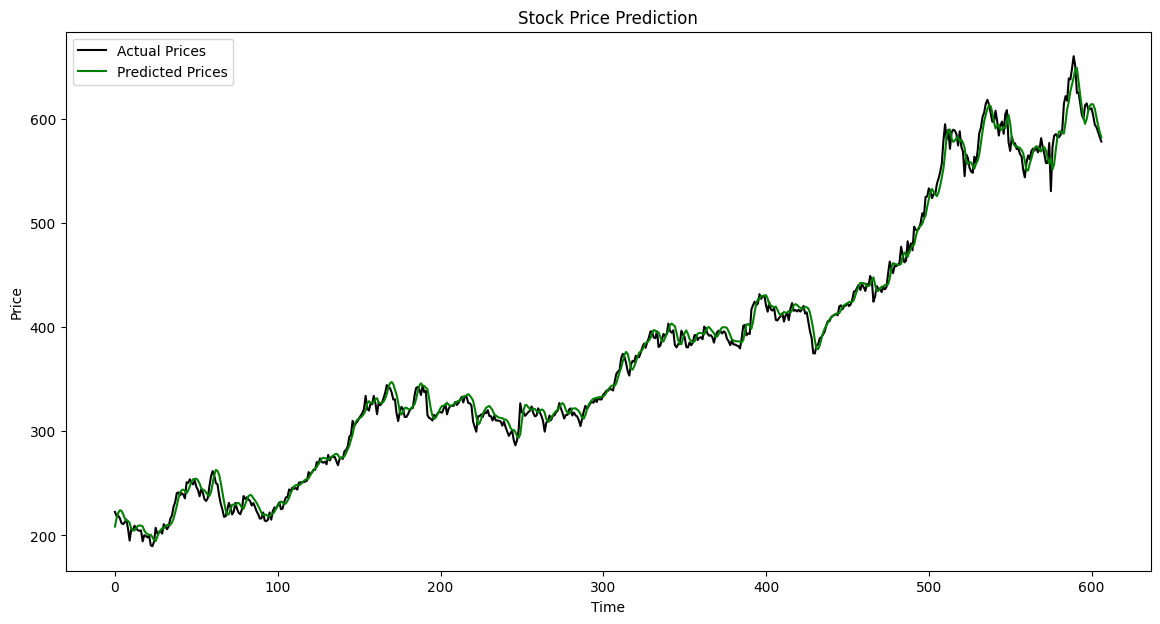

In [38]:
# Make predictions
predicted_prices_scaled = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate R-squared value
r2 = r2_score(actual_prices, predicted_prices)
print(f'R-squared Value: {r2:.2f}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(actual_prices, color='black', label='Actual Prices')
plt.plot(predicted_prices, color='green', label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()